### Basic Time Series Analysis
# Method of Moving Averages
#### DS119 - Exploratory Data Analysis

The moving average is commonly used with time series to smooth random short-term variations and to highlight other components (trend, season, or cycle) present in your data. The moving average is also known as rolling mean and is calculated by averaging data of the time series within k periods of time. Moving averages are widely used in finance to determine trends in the market and in environmental engineering to evaluate standards for environmental quality such as the concentration of pollutants.

In this lesson, we tackle simple moving averages (SMA). 

First, let's create dummy time series data and try implementing SMA using Python.

Assume that there is a demand for a product and it is observed for 12 months (1 Year), and you need to find moving averages for 3 and 4 months window periods.

$$ Import \space Module$$

In [1]:
import pandas as pd
import numpy as np

This code imports two Python libraries, pandas and numpy, using the "import" keyword.

Pandas is a library used for data manipulation and analysis, while numpy is a library used for scientific computing and numerical operations.

By importing these libraries, the user can access their functions and methods to perform various data analysis tasks.

The "as" keyword is used to create an alias for the libraries, which can be used to reference them in the code.

For example, "pd" is an alias for pandas, and "np" is an alias for numpy.

This makes it easier to reference the libraries in the code and can help to make the code more readable.

$$ Create \space Data$$

In [2]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}

This code creates a dictionary called product with two keys: month and demand.

The month key has a list of integers representing the months of the year, and the demand key has a list of integers representing the demand for a certain product in each month.

The succeeding commands create the hypothetical data and show some features.

In [3]:
df = pd.DataFrame(product)

In [4]:
df.head()

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


$$SMA \space Implementation$$

Let's calculate SMA for a window size of 3, which means you will consider three values each time to calculate the moving average, and for every new value, the oldest value will be ignored.

To implement this, you will use pandas $\texttt{iloc}$ function, since the demand column is what you need, you will fix the position of that in the $\texttt{iloc}$ function while the row will be a variable $i$ which you will keep iterating until you reach the end of the dataframe.

In [5]:
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

This code uses a for loop to iterate over a range of values from 0 to the number of rows in the DataFrame minus 2.

Within the loop, it uses the loc method to access a specific row in the DataFrame and set a value for a specific column.

The row is accessed using the index value i+2, and the column is named 'SMA_3'.

The value that is set for this column is calculated using the np.round function, which rounds a given number to a specified number of decimal places.

The calculation itself takes the average of three values from the DataFrame, which are accessed using the iloc method.

The iloc method is used to access rows and columns by their integer position, rather than by their index or label values.

Overall, this code is calculating a simple moving average (SMA) for a DataFrame column named '1', using a window size of 3.

The SMA is calculated for each row in the DataFrame, except for the last two rows, which do not have enough data to calculate a full SMA.

In [6]:
df

,month,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.3
3,4,300,282.7
4,5,310,299.3
5,6,303,304.3
6,7,329,314.0
7,8,340,324.0
8,9,316,328.3
9,10,330,328.7


For a sanity check, let's also use the pandas in-built $\texttt{rolling}$ function and see if it matches with our custom python based simple moving average.

In [7]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

This code adds a new column called 'pandas_SMA_3' to the DataFrame 'df'.

The values in this column are calculated by taking the rolling mean of the second column of the DataFrame (index 1), with a window size of 3.

The $\texttt{rolling()}$ function is a pandas function that creates a rolling window object, which can be used to perform rolling calculations on a DataFrame.

The $\texttt{mean()}$ function is then applied to this rolling window object to calculate the mean of the values in the window.

The iloc function is used to select the second column of the DataFrame (index 1) for the rolling calculation.

The : before the comma indicates that all rows should be selected.

Overall, this code calculates a simple moving average (SMA) with a window size of 3 for the second column of the DataFrame, and stores the results in a new column called 'pandas_SMA_3'.

In [8]:
df

,month,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.3,279.333333
3,4,300,282.7,282.666667
4,5,310,299.3,299.333333
5,6,303,304.3,304.333333
6,7,329,314.0,314.000000
7,8,340,324.0,324.000000
8,9,316,328.3,328.333333
9,10,330,328.7,328.666667


So as you can see, the custom and pandas moving averages match exactly, which means our implementation of SMA was correct.

Let's also quickly calculate the simple moving average for a window_size of 4.

In [9]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

In [10]:
df

,month,demand,SMA_3,pandas_SMA_3,SMA_4
0,1,290,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN
3,4,300,282.7,282.666667,284.5
4,5,310,299.3,299.333333,289.5
5,6,303,304.3,304.333333,300.2
6,7,329,314.0,314.000000,310.5
7,8,340,324.0,324.000000,320.5
8,9,316,328.3,328.333333,322.0
9,10,330,328.7,328.666667,328.8


In [11]:
df['pandas_SMA_4'] = df.iloc[:,1].rolling(window=4).mean()

In [12]:
df

,month,demand,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,1,290,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN,NaN
3,4,300,282.7,282.666667,284.5,284.50
4,5,310,299.3,299.333333,289.5,289.50
5,6,303,304.3,304.333333,300.2,300.25
6,7,329,314.0,314.000000,310.5,310.50
7,8,340,324.0,324.000000,320.5,320.50
8,9,316,328.3,328.333333,322.0,322.00
9,10,330,328.7,328.666667,328.8,328.75


$$Plotting \space Data$$

In [13]:
import matplotlib.pyplot as plt

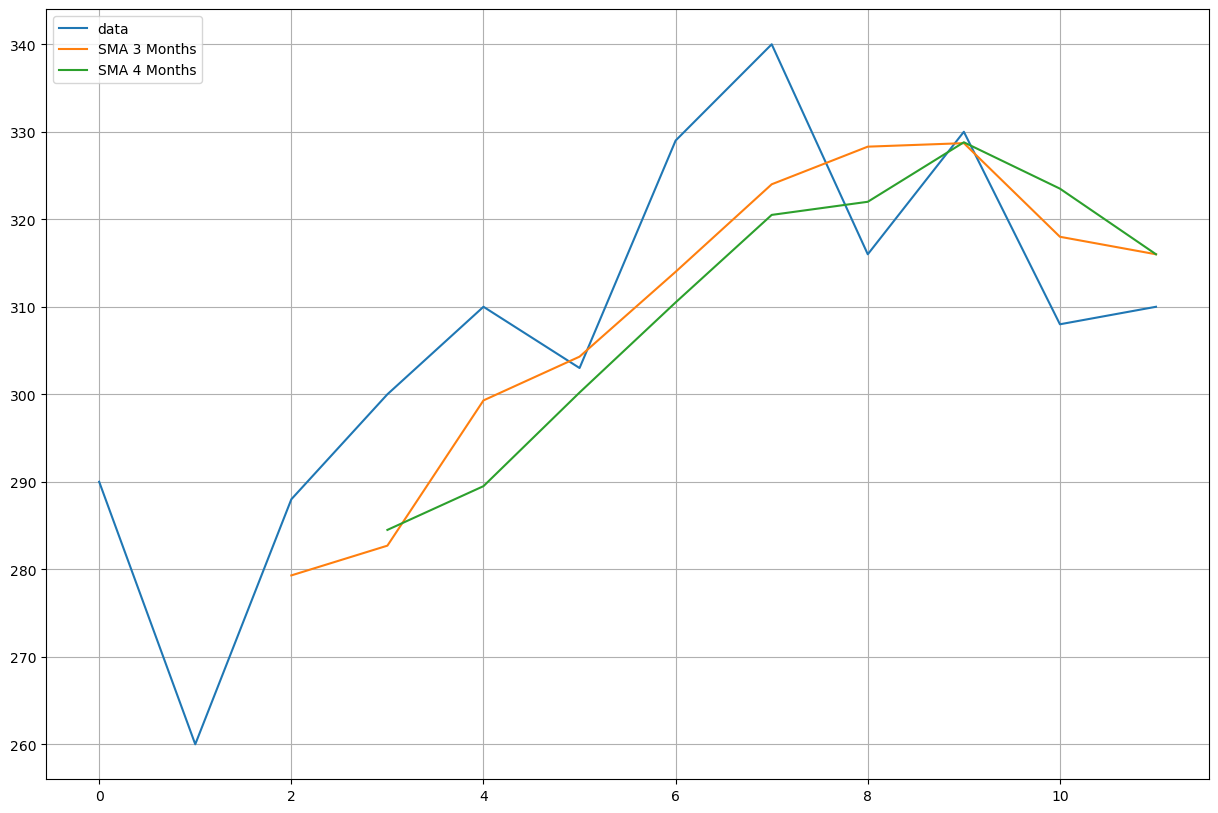

In [14]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demand'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

This code uses the Python library Matplotlib to create a line plot of three different data series.

The first line sets the size of the plot to be 15 inches wide and 10 inches tall.

The second line adds a grid to the plot.

The next three lines plot three different data series: 'demand', 'SMA_3', and 'SMA_4'.

Each line is labeled with a string that will be used in the legend.

Finally, the legend() function is called to display a legend in the upper left corner of the plot, using the labels specified earlier.

The loc=2 argument specifies that the legend should be placed in the upper left corner of the plot.

##### Homework

Add another year in the original dataset using the following values of demand: 288, 304, 315, 310, 330, 300, 290, 345, 360, 320, 300, 350

1) Perform 4-year SMA and 5-year SMA. 

2) Draw the trend lines.

3) Interpret the graph.

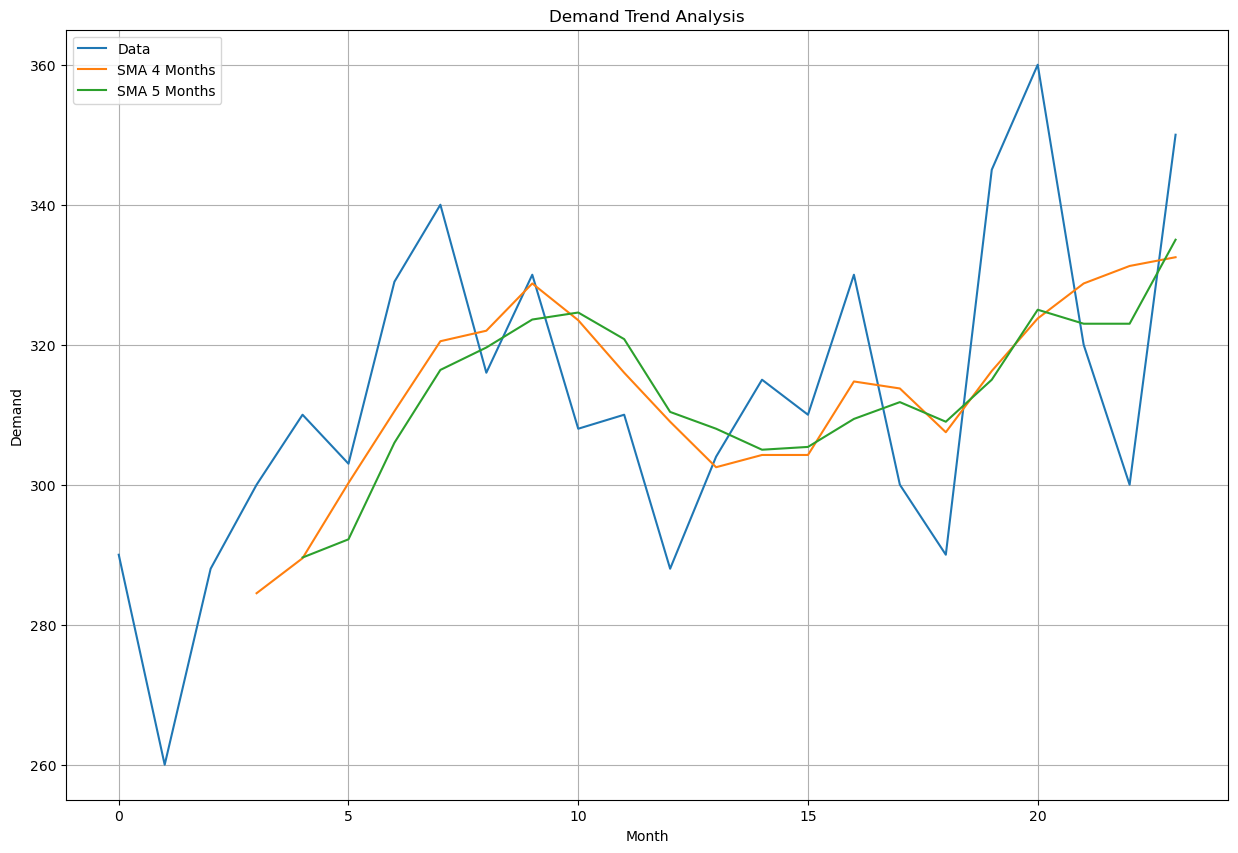

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Original dataset
product = {'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           'demand': [290, 260, 288, 300, 310, 303, 329, 340, 316, 330, 308, 310]}
df = pd.DataFrame(product)

# New data for another year
new_data = {'month': list(range(13, 25)),
            'demand': [288, 304, 315, 310, 330, 300, 290, 345, 360, 320, 300, 350]}
df_new = pd.DataFrame(new_data)

# Concatenate original and new data
df = pd.concat([df, df_new], ignore_index=True)

# Calculate 4-month SMA
df['SMA_4'] = df['demand'].rolling(window=4).mean()

# Calculate 5-month SMA
df['SMA_5'] = df['demand'].rolling(window=5).mean()

# Plotting the trend lines
plt.figure(figsize=[15, 10])
plt.grid(True)
plt.plot(df['demand'], label='Data')
plt.plot(df['SMA_4'], label='SMA 4 Months')
plt.plot(df['SMA_5'], label='SMA 5 Months')
plt.legend(loc=2)

# Trend lines interpretation
plt.title('Demand Trend Analysis')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.show()

The graph displays the two-year trend of a product's demand. The orange and green lines indicate the 4-month and 5-month trend lines, respectively, while the blue line shows the actual demand data. We can better determine the general direction of demand by using the trend lines. It is clear that the demand started to rise and peaked during the eighth month. It then began to deteriorate. The trend lines even out the short-term ups and downs so we can see the underlying trend more clearly. We can improve our projections, improve the way we manage our inventory, and make wiser business decisions by looking at these trends.